In [235]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import datasets, svm 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
iris=pd.read_csv('iris.csv')

In [237]:
iris.sample(3)

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
26,5.0,3.4,1.6,0.4,setosa
8,4.4,2.9,1.4,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica


In [238]:
encoder=LabelEncoder()

In [239]:
iris['Species']=encoder.fit_transform(iris['Species'])

In [240]:
iris.sample()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Species
35,5.0,3.2,1.2,0.2,0


In [241]:
features=iris.columns[:-1]
target=iris.columns[-1]

In [242]:
train,test=train_test_split(iris,test_size=0.4)

In [243]:
kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(train[features], train[target])
    predicted=model.predict(test[features])
    acc = accuracy_score(test[target],predicted)*100
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

95.0 % accuracy obtained with kernel = linear
90.0 % accuracy obtained with kernel = poly
93.33333333333333 % accuracy obtained with kernel = rbf


# Visualize the decision boundaries

In [244]:
features=features[:2]
#since the features petal-length and petal-width can be easily classified so we take first two features

In [245]:
svc = svm.SVC(kernel='linear').fit(train[features],train[target] )
rbf_svc = svm.SVC(kernel='rbf', gamma=0.8).fit(train[features], train[target])
poly_svc = svm.SVC(kernel='poly', degree=4).fit(train[features], train[target])

In [246]:
#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = iris[iris.columns[0]].min() - 1, iris[iris.columns[0]].max() + 1
y_min, y_max = iris[iris.columns[1]].min() - 1, iris[iris.columns[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

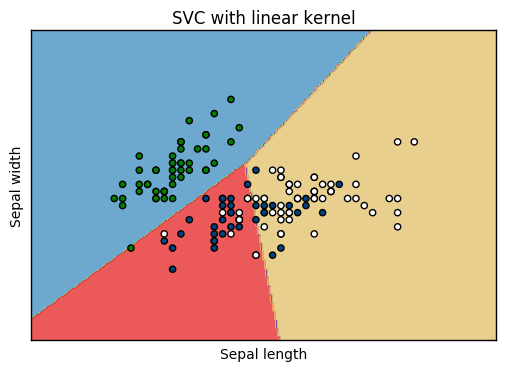

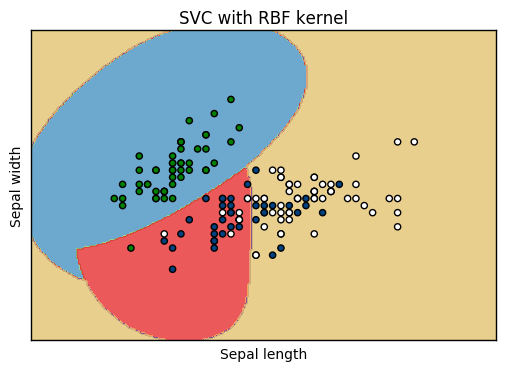

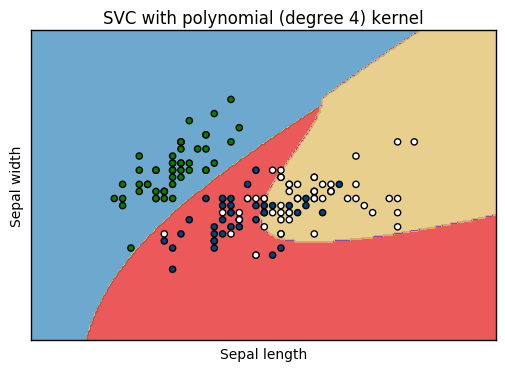

In [247]:
#Define title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 4) kernel']


for i, model in enumerate((svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel returns continuous flaten array

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    #cmap stands for color map you can also make it to None

    
    
    # Plot also the training points
    plt.scatter(iris[features[0]], iris[features[1]], c=iris[target], cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [248]:
#Checking the support vectors of the linear kernel
print("The support vectors for linear kernel are:\n", svc.support_vectors_)
print()
print()

#Checking the support vectors of the rbf kernel
print("The support vectors for radial basis function are:\n", rbf_svc.support_vectors_)
print()
print()

#Checking the support vectors of the polynomial kernel (for example)
print("The support vectors for polynomial kernel are:\n", poly_svc.support_vectors_)


The support vectors for linear kernel are:
 [[ 5.   3.2]
 [ 5.7  3.8]
 [ 5.4  3.4]
 [ 5.4  3.4]
 [ 5.8  4. ]
 [ 4.9  3. ]
 [ 5.   3. ]
 [ 4.9  3.1]
 [ 6.6  3. ]
 [ 5.   2.3]
 [ 5.7  2.9]
 [ 6.1  2.9]
 [ 5.2  2.7]
 [ 6.7  3.1]
 [ 6.1  3. ]
 [ 5.4  3. ]
 [ 5.5  2.4]
 [ 5.6  2.7]
 [ 6.4  3.2]
 [ 5.8  2.7]
 [ 6.3  2.3]
 [ 6.9  3.1]
 [ 4.9  2.4]
 [ 5.7  2.8]
 [ 5.6  2.9]
 [ 5.9  3.2]
 [ 5.7  2.8]
 [ 7.   3.2]
 [ 6.   2.9]
 [ 6.   2.2]
 [ 6.6  2.9]
 [ 6.5  3. ]
 [ 6.3  3.4]
 [ 5.6  2.8]
 [ 6.5  3. ]
 [ 6.3  3.3]
 [ 6.4  2.8]
 [ 6.3  2.9]
 [ 6.4  2.7]
 [ 6.4  2.8]
 [ 6.   2.2]
 [ 6.4  3.2]
 [ 6.2  2.8]
 [ 5.8  2.8]
 [ 6.3  2.7]
 [ 6.3  2.8]
 [ 6.1  2.6]
 [ 5.8  2.7]
 [ 5.9  3. ]
 [ 6.5  3. ]]


The support vectors for radial basis function are:
 [[ 5.7  3.8]
 [ 5.4  3.4]
 [ 5.4  3.4]
 [ 5.8  4. ]
 [ 4.9  3. ]
 [ 5.   3. ]
 [ 4.3  3. ]
 [ 4.9  3.1]
 [ 6.6  3. ]
 [ 5.   2.3]
 [ 5.7  2.9]
 [ 6.1  2.9]
 [ 5.2  2.7]
 [ 6.7  3.1]
 [ 6.1  3. ]
 [ 5.4  3. ]
 [ 5.6  2.7]
 [ 6.4  3.2]
 [ 5.8  2.7]
 [ 6